In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

import datetime as dt

from wordcloud import WordCloud, STOPWORDS

In [ ]:
df=pd.read_csv("cleaned-BA-reviews.csv",index_col=0)

In [ ]:
df = df.reset_index()

In [ ]:
df

,index,reviews,date,stars,corpus
0,0,"Facebook full of romance scams, vehicle scams,...",2023-11-12,1,facebook full romance scam vehicle scam crypto...
1,1,FB Marketplace a scammers paradise.I'd say mor...,2023-11-10,1,fb marketplace scammer paradise say half add s...
2,2,Absolutely rubbish they encourage you to repor...,2023-11-11,1,absolutely rubbish encourage report bullying a...
3,3,1 star is too generous. My Facebook account ac...,2023-11-12,1,1 star generous facebook account active since ...
4,4,Facebook has let someone hack a dead man's acc...,2023-11-12,1,facebook let someone hack dead man account loa...
...,...,...,...,...,...
1839,1995,"Thoroughly recommended, quick and efficient, m...",2022-01-22,5,thoroughly recommended quick efficient many th...
1840,1996,"Facebook allows Fake & ""Alias"" accounts for pe...",2022-01-22,1,facebook allows fake alias account people bad ...
1841,1997,Poor standards and support. Reported video whe...,2022-01-22,1,poor standard support reported video animal ki...
1842,1998,This is nothing less than the world's biggest ...,2022-01-22,1,nothing le world biggest pedophile site need s...


#### What is the average overall rating given for British Airways?

In [ ]:
df['stars'].mean()

1.4126898047722343

#### What is the total counts for each ratings?

Text(0.5, 0.98, 'Counts for each ratings')

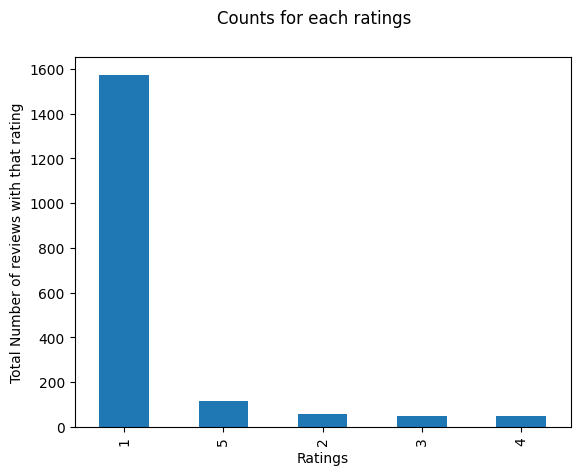

In [ ]:
df.stars.value_counts().plot(kind="bar")
plt.xlabel("Ratings")
plt.ylabel("Total Number of reviews with that rating")
plt.suptitle("Counts for each ratings")

In [ ]:
df_ratings = pd.DataFrame(df.stars.value_counts())
pct_values = (df_ratings.stars.values/ df_ratings.stars.values.sum() *100).tolist()
pct_values = [round(x,2) for x in pct_values]
df_ratings['pct_values'] = pct_values

In [ ]:
df_ratings = df_ratings.reset_index()

In [ ]:
df_ratings.rename(columns={'index':'Stars', 'stars':'total_counts'}, inplace=True)

Text(0.5, 1.0, 'Counts for each ratings')

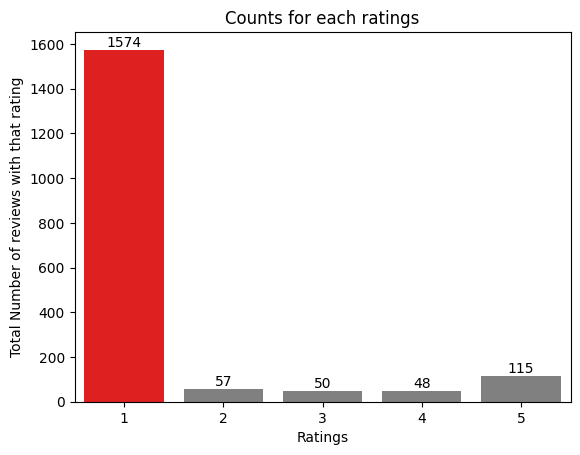

In [ ]:
clrs = ['Red' if (x ==  max(df_ratings.total_counts)) else 'grey' for x in df_ratings.total_counts ]
ax = sns.barplot(x=df_ratings.Stars, y=df_ratings.total_counts, data=df_ratings, errwidth=0,
                palette=clrs)


ax.bar_label(ax.containers[0])

ax.set_xlabel("Ratings")
ax.set_ylabel("Total Number of reviews with that rating")
ax.set_title("Counts for each ratings")

#### Time Series Analysis

In [ ]:
fig = px.line(df, x='date', y="stars")
fig.update_xaxes(rangeslider_visible=True)
fig.show()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


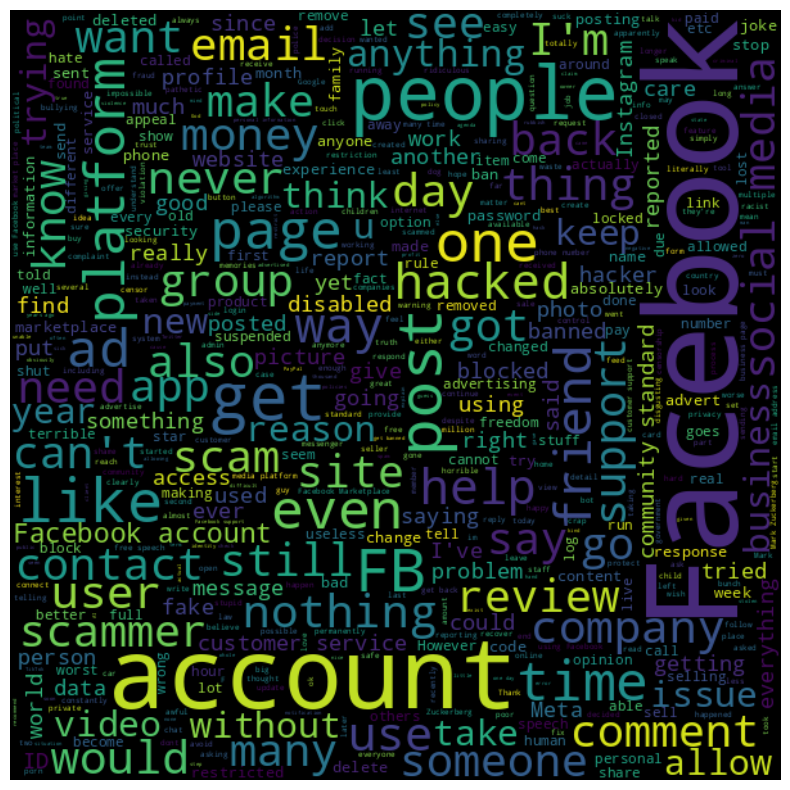

In [ ]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
# Start with one review:
reviews = " ".join(df.reviews)
plt.figure(figsize=(20,10))

stopwords = set(stopwords.words('english'))

# Create and generate a word cloud image:
wordcloud = WordCloud(height=600,width=600,max_font_size=100, max_words=500, stopwords=stopwords).generate(reviews)
# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [ ]:
from nltk import ngrams
from nltk.probability import FreqDist

from sklearn.feature_extraction import text
from sklearn.feature_extraction.text import TfidfVectorizer

words = reviews.split(" ")

new_words = [word for word in words if word not in stopwords]

nlp_words=FreqDist(new_words).most_common(20)

#create a dataframe of these word and its frequencies
all_fdist = pd.Series(dict(nlp_words))

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]),
 [Text(0, 0, 'I'),
  Text(1, 0, 'Facebook'),
  Text(2, 0, ''),
  Text(3, 0, 'account'),
  Text(4, 0, 'get'),
  Text(5, 0, 'people'),
  Text(6, 0, 'They'),
  Text(7, 0, 'like'),
  Text(8, 0, 'even'),
  Text(9, 0, 'facebook'),
  Text(10, 0, 'one'),
  Text(11, 0, 'The'),
  Text(12, 0, 'FB'),
  Text(13, 0, 'time'),
  Text(14, 0, 'use'),
  Text(15, 0, 'got'),
  Text(16, 0, 'post'),
  Text(17, 0, 'platform'),
  Text(18, 0, 'social'),
  Text(19, 0, 'many')])

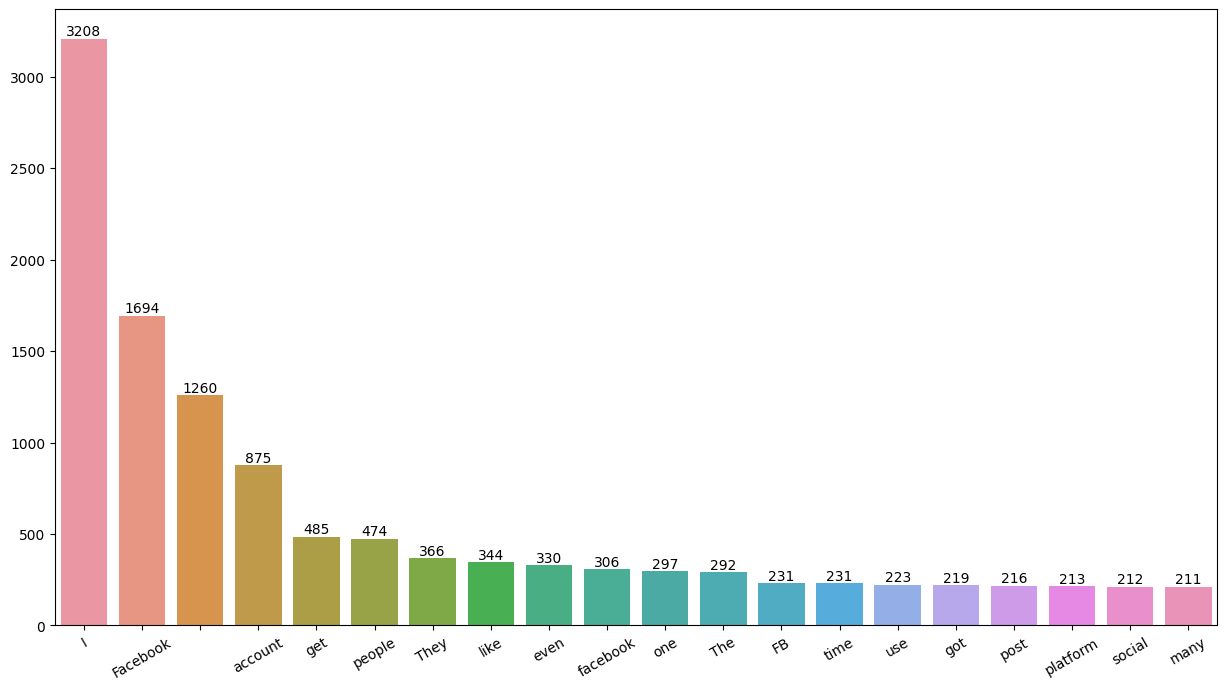

In [ ]:
## Setting figure, ax into variables
fig, ax = plt.subplots(figsize=(15,8))

## Seaborn plotting using Pandas attributes + xtick rotation for ease of viewing
all_plot = sns.barplot(x=all_fdist.index, y=all_fdist.values, ax=ax)
all_plot.bar_label(all_plot.containers[0])
plt.xticks(rotation=30)

<Axes: >

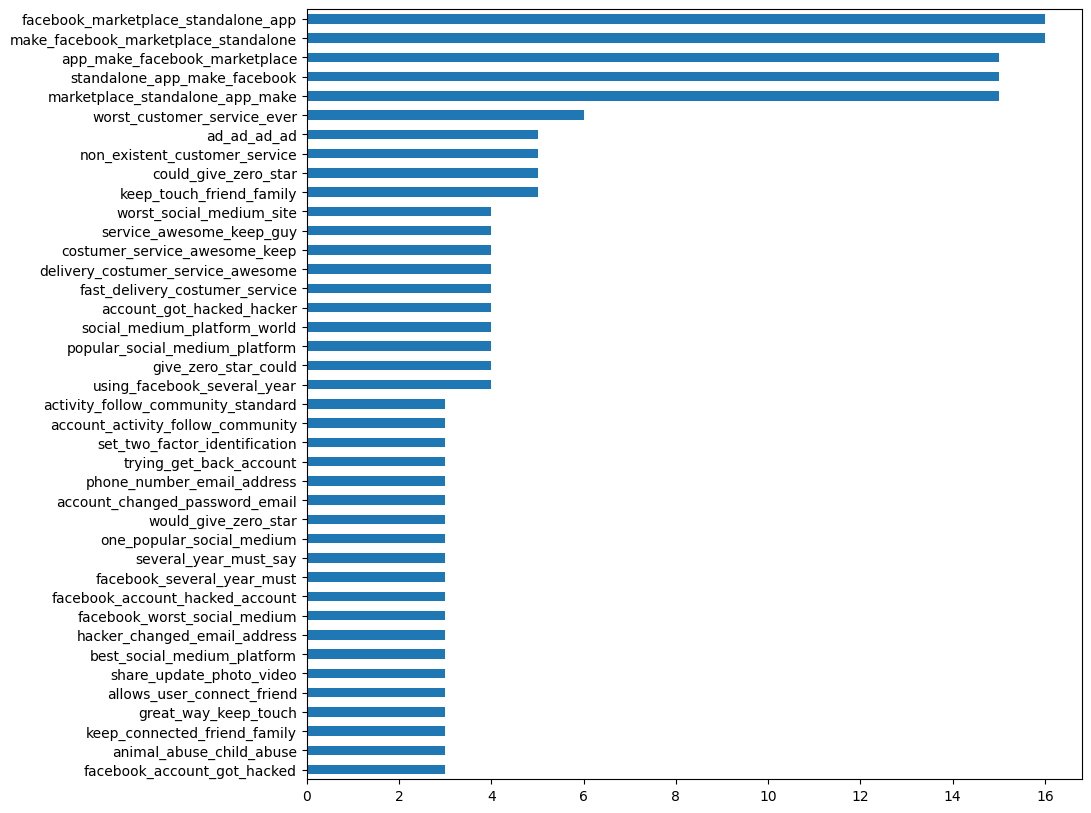

In [ ]:
import nltk.collocations as collocations
from nltk import FreqDist, bigrams

reviews = " ".join(df.corpus)

words = reviews.split(" ")

new_words = [word for word in words if word not in stopwords]

def get_freq_dist(new_words,number_of_ngrams ):
    from nltk import ngrams


    ngrams = ngrams(new_words, number_of_ngrams)


    ngram_fd = FreqDist(ngrams).most_common(40)


    ngram_sorted = {k:v for k,v in sorted(ngram_fd, key=lambda item:item[1])}


    ngram_joined = {'_'.join(k):v for k,v in sorted(ngram_fd, key=lambda item:item[1])}


    ngram_freqdist = pd.Series(ngram_joined)
    plt.figure(figsize=(10,10))
    ax = ngram_freqdist.plot(kind="barh")

    return ax


get_freq_dist(new_words,4)

#### VADER Sentiment Scoring

In [ ]:
%%capture
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm

vds = SentimentIntensityAnalyzer()

res = {}
for i, row in tqdm(df.iterrows(), total=len(df)):
    text = row['corpus']
    myindex = row['index']
    res[myindex] = vds.polarity_scores(text)

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


In [ ]:
vaders = pd.DataFrame(res).T
vaders = vaders.reset_index().rename(columns={'index': 'index'})
vaders = vaders.merge(df, how='left')

In [ ]:
vaders.head()

,index,neg,neu,pos,compound,reviews,date,stars,corpus
0,0,0.292,0.433,0.275,-0.4490,"Facebook full of romance scams, vehicle scams,...",2023-11-12,1,facebook full romance scam vehicle scam crypto...
1,1,0.318,0.552,0.129,-0.9186,FB Marketplace a scammers paradise.I'd say mor...,2023-11-10,1,fb marketplace scammer paradise say half add s...
2,2,0.390,0.489,0.121,-0.9818,Absolutely rubbish they encourage you to repor...,2023-11-11,1,absolutely rubbish encourage report bullying a...
3,3,0.170,0.546,0.284,0.8940,1 star is too generous. My Facebook account ac...,2023-11-12,1,1 star generous facebook account active since ...
4,4,0.305,0.594,0.101,-0.7845,Facebook has let someone hack a dead man's acc...,2023-11-12,1,facebook let someone hack dead man account loa...


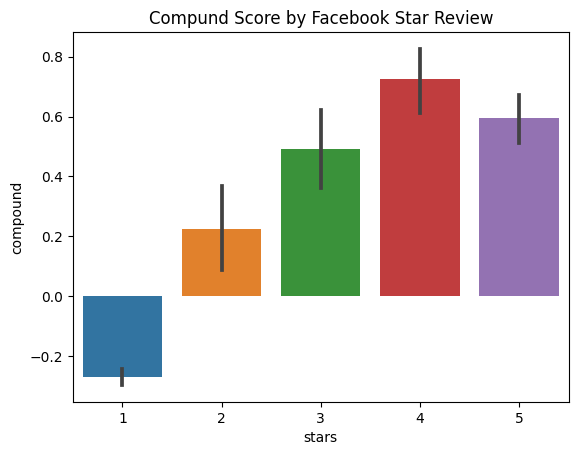

In [ ]:
ax = sns.barplot(data=vaders, x='stars', y='compound')
ax.set_title('Compund Score by Facebook Star Review')
plt.show()

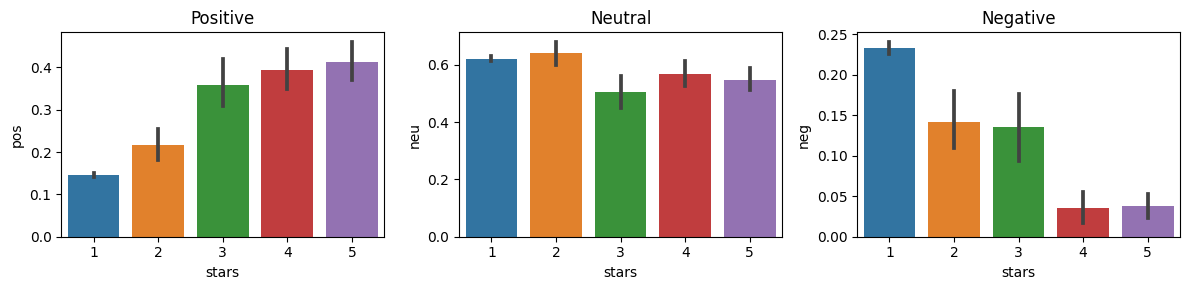

In [ ]:
fig, axs = plt.subplots(1, 3, figsize=(12, 3))
sns.barplot(data=vaders, x='stars', y='pos', ax=axs[0])
sns.barplot(data=vaders, x='stars', y='neu', ax=axs[1])
sns.barplot(data=vaders, x='stars', y='neg', ax=axs[2])
axs[0].set_title('Positive')
axs[1].set_title('Neutral')
axs[2].set_title('Negative')
plt.tight_layout()
plt.show()

#### Roberta Pretrained Model

In [ ]:
from transformers import AutoTokenizer
from transformers import AutoModelForSequenceClassification
from scipy.special import softmax

In [ ]:
MODEL = f"cardiffnlp/twitter-roberta-base-sentiment"
tokenizer = AutoTokenizer.from_pretrained(MODEL)
model = AutoModelForSequenceClassification.from_pretrained(MODEL)

config.json:   0%|          | 0.00/747 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/150 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/499M [00:00<?, ?B/s]

In [ ]:
def polarity_scores_roberta(example):
    encoded_text = tokenizer(example, return_tensors='pt')
    output = model(**encoded_text)
    scores = output[0][0].detach().numpy()
    scores = softmax(scores)
    scores_dict = {
        'roberta_neg' : scores[0],
        'roberta_neu' : scores[1],
        'roberta_pos' : scores[2]
    }
    return scores_dict


#### Combine and compare

In [ ]:
res = {}
for i, row in tqdm(df.iterrows(), total=len(df)):
    try:
        text = row['corpus']
        myindex = row['index']
        vader_result = vds.polarity_scores(text)
        vader_result_rename = {}
        for key, value in vader_result.items():
            vader_result_rename[f"vader_{key}"] = value
        roberta_result = polarity_scores_roberta(text)
        both = {**vader_result_rename, **roberta_result}
        res[myindex] = both
    except RuntimeError:
        print(f'Broke for id {myindex}')

  0%|          | 0/1844 [00:00<?, ?it/s]

In [ ]:
results_df = pd.DataFrame(res).T
results_df = results_df.reset_index().rename(columns={'index': 'index'})
results_df = results_df.merge(df, how='left')

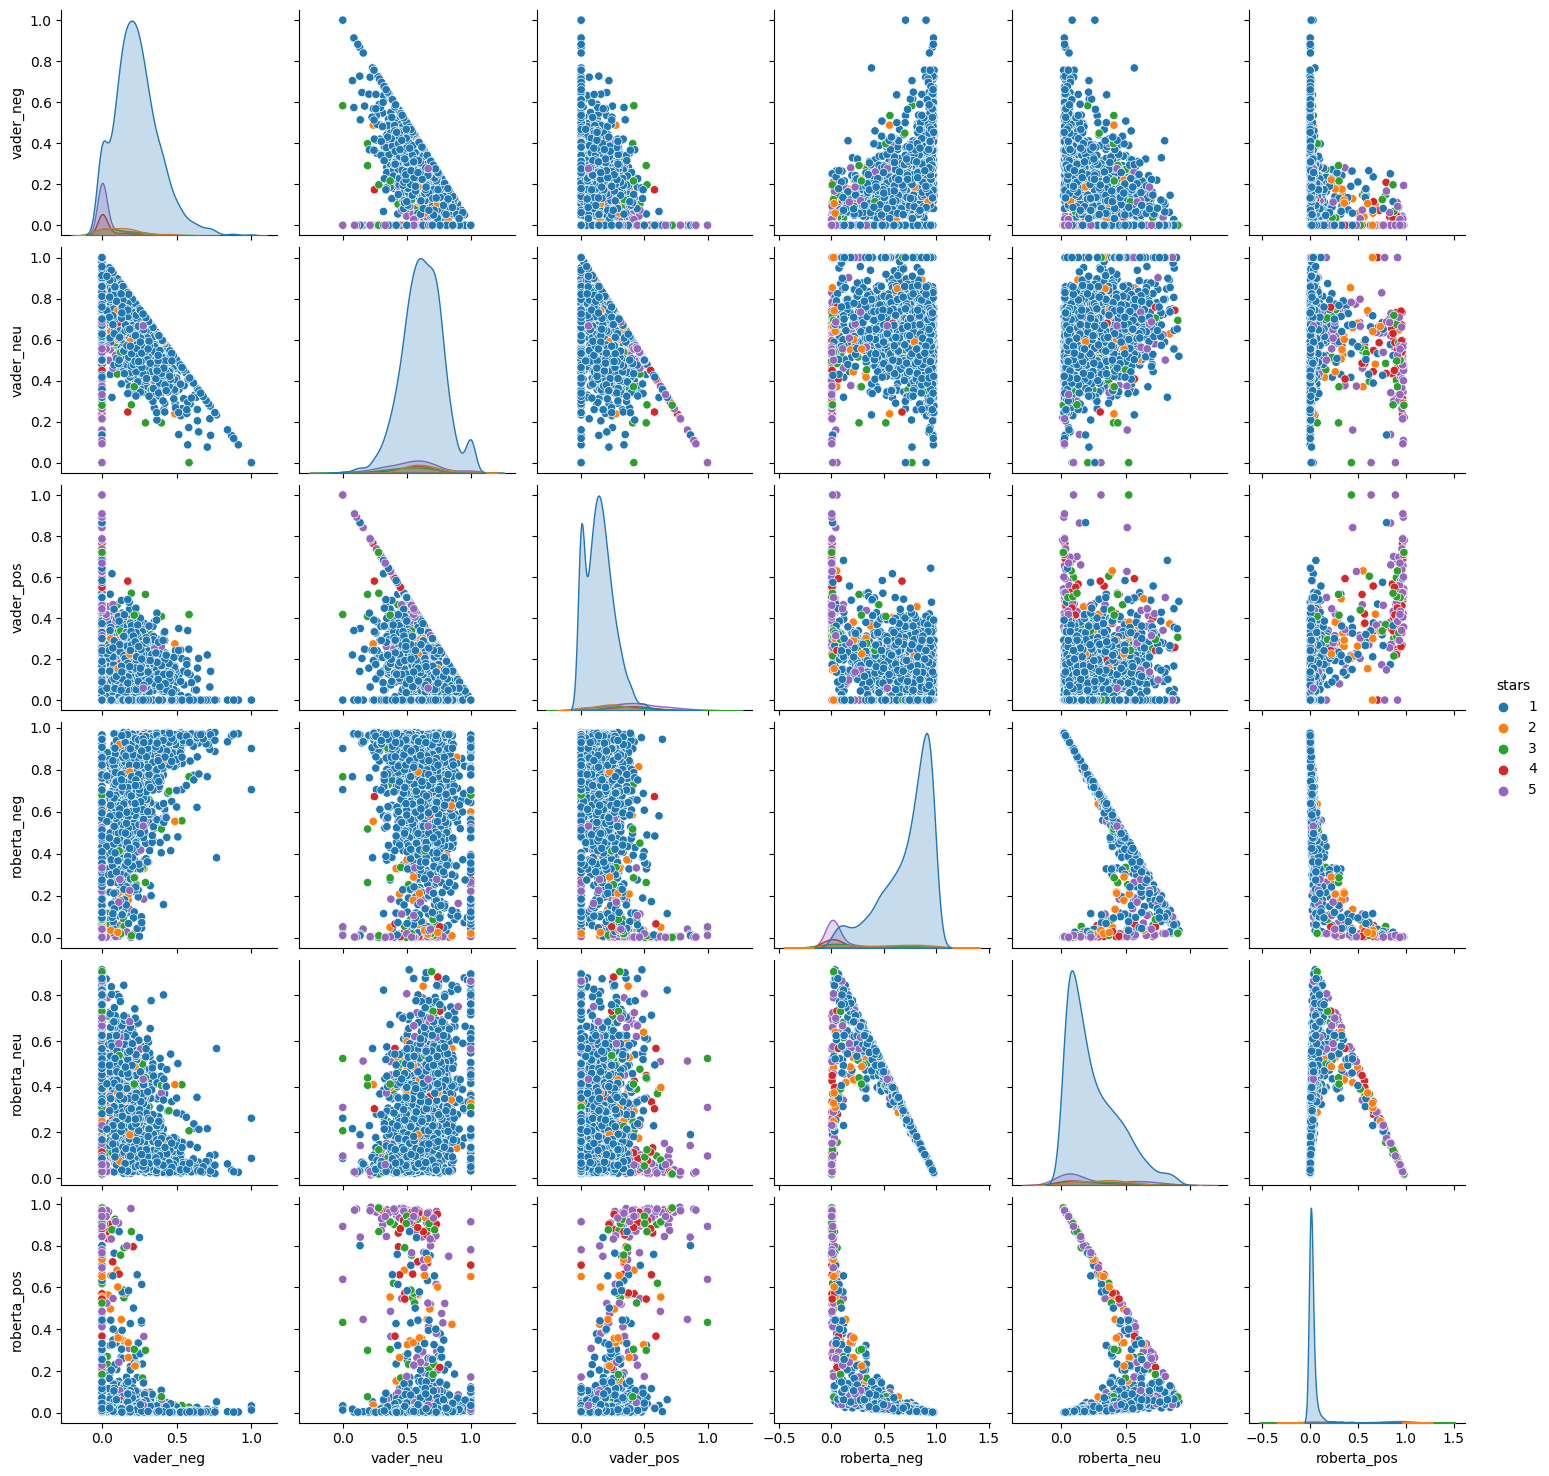

In [ ]:
sns.pairplot(data=results_df,
             vars=['vader_neg', 'vader_neu', 'vader_pos',
                  'roberta_neg', 'roberta_neu', 'roberta_pos'],
            hue='stars',
            palette='tab10')
plt.show()